> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating the NO-SHOW Appointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

I've chosen to investigate the no-show appointments dataset gotten from Kaggle. The dataset contains 110527 records of different appointments confirming whether or not patients showed up for their appointments. The dataset consists of 14 columns/features  which are:

1. PatientId: Identification number of patients.
2. AppointmentId: Identification number of different appointments.
3. Gender: Gender/Sex of each patients, either female or male.
4. ScheduledDay: tells us on what day the patient set up their appointment.
5. AppointmentDay: The day of the actual appointment, when the patients have to visit the doctor.
6. Age: The age of different patients.
7. Neighborhood: indicates the location of the hospital where the appointment is meant to take place.
8. Scholarship: This could be quite a confusing feature. indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (Family Allowance which is a social welfare program).
9. Hipertension: Indicates whether or not the patient has hypertension, with 1 meaning True and 0 meaning False.
10. Diabetes: Indicates whether or not the patient has diabetes, with 1 meaning True and 0 meaning False.
11. Alcoholism: Indicates whether or not the patient is alcoholic, with 1 meaning True and 0 menaing False.
12. Handcap: Indicates whether or not the patient is handicapped, with 1 meaning True and 0 menaing False.
13. SMS_received: Indicates whether or not the patient received an sms. With 1 indicating True and 0 indicating False.
14. No-Show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

1. Which kind of diseases contribute majorly to not showing up for an appointment?
2. Which age groups are most likely to show up and why?
3. In grouping gender and age together, which gender in different age groups is most likely to show up for appointments?
4. Which day of the week do patients often miss and show up for their appointments?
5. Which factors/featured characterizes and differentiates appointments that are often missed and not?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
#import statements for all of the packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

I had to comment the upgrade pandas code because it disturbed some codes such as .describe(), such codes gave an error output

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
medappoints = pd.read_csv("KaggleV2-May-2016.csv")

In [4]:
#Getting the top five rows of the data
medappoints.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking the necessary information about the datasuch as the datatypes, the number of non-null (i.e non-missing) values present
in each column and the column names

In [5]:
medappoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the output above, it can be seen that both the PatientId is float, there will be a need to convert it to integers since it
is an identification number, the ScheduledDay and the AppointmentDay will need tto be changed to datetime datatype since they are meant to be dates. Lastly, the No-show and Handcap columns will need to be renamed for the purpose of clarity. All these will be done in the data cleaning section.

In [6]:
#Summary statistics of each column
medappoints.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Checkig to confirm if there are any missing Values in any columns of the dataset.
medappoints.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Fortunately, there are no missing values, it is time to check for outliers by checking for unique values in strings and then using plots for numerical variables.

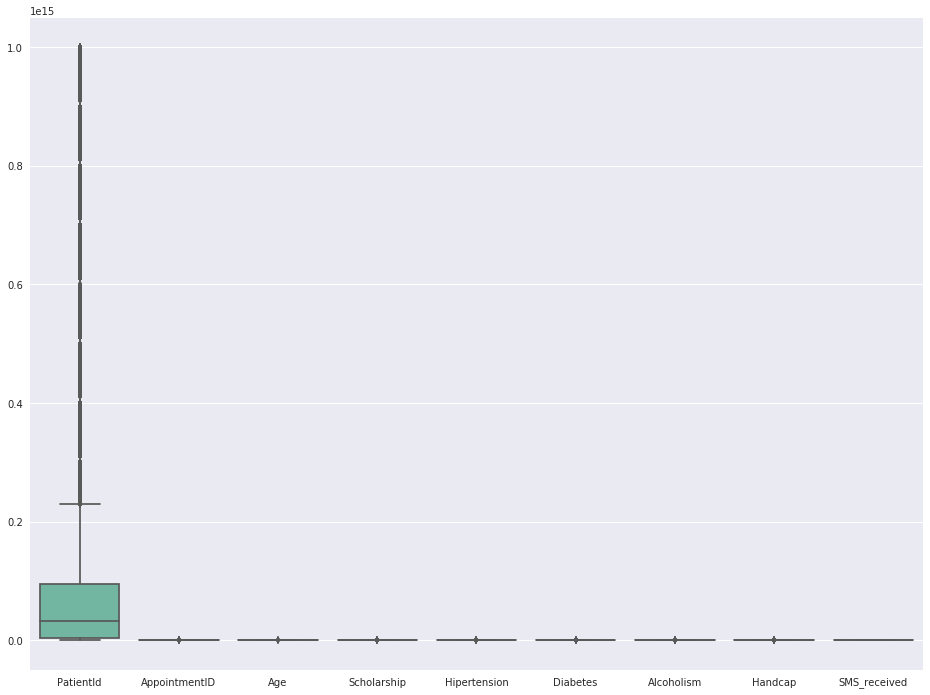

In [8]:
#Plotting boxplots to detect outliers

sns.set(rc = {'figure.figsize':(16, 12)})
ax = sns.boxplot(data=medappoints, palette="Set2")

The boxplot and the interquartile range are quite funny because it seems like half of the records have been identified as outliers, it would be really daangerous to drop half of the dataset, so i will do a bit of cleaning on the datatypes first before deciding to deal with the outliers

In [9]:
#Creating a function to count distinct values present in columns to avoid repetitions
def counting_values (table_name,column_name):
    print(table_name[column_name].value_counts())

In [10]:
#Creating a for loop to print out distinct values for each column altogether

medcolumns=medappoints.columns
for columns in medcolumns:
    print(counting_values(medappoints, columns), sep="/n/n")

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

By running the code above, The output shows that for the appointments recorded, only three months were recorded, this implies that I have to change one of my questions from "Which time of the year do patients often miss their appointments?" to "Which time of the day do patients often miss their appointments?" Alos Column Handcap will need to be cleaned, I can either decide to drop rows having 2,3,4 or decide to change their values

I had to check the value counts of both to see whether to drop them or not. I'm definitely keeping PatientID because it shows that for one patient, there are different medical records for appointments. The AppointmentID wiil be dropped because it shows different distinct appointments.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
#Converting "PatientId" column to an integer
medappoints['PatientId']=medappoints['PatientId'].astype(int)

In [13]:
#Converting 'AppointmentID' and ScheduledDay to dates since they are meant to be in the date format rather than string
medappoints['ScheduledDay']=pd.to_datetime(medappoints[
    'ScheduledDay'])
medappoints['AppointmentDay']=pd.to_datetime(medappoints[
    'AppointmentDay'])

In [14]:
#Checking the updated table
medappoints.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Renaming the dependent variable "No-show" and the independent variable "Handcap for the purpose of clarity
medappoints.rename(columns={'No-show': 'Absent_for_Appointment'}, inplace=True)
medappoints.rename(columns={'Handcap': 'Handicapped'}, inplace=True)

In [16]:
medappoints.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Dropping the AppointmetID since it won't contribute much to the analysis process because it has different and distinct values.
medappoints.drop(columns='AppointmentID', inplace=True)

Before dropping any rows, it is important to see how much they are relevant to the rest of the dataset, which is why I will be calculating the percentage of the 2,3,4 rows in Handcap column present in the dataset

In [18]:
#calculating the percentage of the 2,3,4 rows in Handcap column present in the dataset
percent_of_handcap_outliers=((len(medappoints.query('Handicapped==4'))+len(medappoints.query('Handicapped==3'))+
                                                                       len(medappoints.query('Handicapped==2')))/len(medappoints))*100
percent_of_handcap_outliers

0.18004650447401993

The percentage is quite small, i can drop it without it having much effect on the dataset

In [19]:
#Assigning all defaulting rows(rows with 2,3,4 under column Handicapped) into a new table
data = medappoints.loc[medappoints["Handicapped"] > 1] 

In [20]:
#Checking the length of the new table to check if its correct
len(data)

199

Also in the age column, -1 is definitely an outlier and it has to be dropped becuase it's impossible to have age as -1

In [21]:
#Assigning rows where age is -1 into a new table
age_drop = medappoints.loc[medappoints["Age"]==-1]

In [22]:
#Dropping the defaulting haandicapped rows from the original data by making use of the index of the new table and specifiying the place
#from which the data should be dropped as rows(0).
medappoints.drop(data.index, axis=0, inplace=True)

In [23]:
#Dropping the defaulting age rows from the original data by making use of the index of the new table and specifiying the place
#from which the data should be dropped as rows(0).
medappoints.drop(age_drop.index, axis=0, inplace=True)

In [24]:
#Confirming the length of the original data to see if the change has been effected
len(medappoints)

110327

One of my analysis questions has to do with time and to get a closer look at the time, there will be a need to extract the time and weekday from the scheduled day column and create another column called scheduled time for it.

In [25]:
#Extracting time from the ScheduledDay column and creating a new column for it within the data
medappoints['ScheduledTime']=medappoints['ScheduledDay'].dt.time

In [26]:
#confirming new
medappoints.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment,ScheduledTime
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


In [27]:
#Extracting day from the ScheduledDay column and creating a new column for it within the data
medappoints['ScheduledWeekday']=medappoints['ScheduledDay'].dt.weekday_name

I would love to place the newly created time and weekcolumn next to the scheduledDay column for better visibility. To do this, I will need to pop the two columns from the data and then insert them at specific positions in the dat

In [28]:
#popping columns ScheduledTime and ScheduledWeekday from the data
last_column=medappoints.pop('ScheduledTime')
secondlast_column=medappoints.pop('ScheduledWeekday')

In [29]:
#Inserting the popped columns at position indexx 3 and 4 of the data
medappoints.insert(3, 'ScheduledTime', last_column)
medappoints.insert(4, 'ScheduledWeekday', secondlast_column)

In [30]:
#Confirming if the changes have been effected
medappoints.head()

,PatientId,Gender,ScheduledDay,ScheduledTime,ScheduledWeekday,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
0,29872499824296,F,2016-04-29 18:38:08,18:38:08,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,16:08:27,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04,16:19:04,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29 17:29:31,17:29:31,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23,16:07:23,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1. Which kind of diseases contribute majorly to not showing up for an appointment?

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [32]:
#Replacing the yes and no in the absent for appointment column with 1 and 0 to allow for better analysis
medappoints['Absent_for_Appointment'].replace('No', 0, inplace=True)
medappoints['Absent_for_Appointment'].replace('Yes', 1, inplace=True)

In [33]:
#Confirming if the changes have been effected
medappoints.head()

,PatientId,Gender,ScheduledDay,ScheduledTime,ScheduledWeekday,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
0,29872499824296,F,2016-04-29 18:38:08,18:38:08,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,M,2016-04-29 16:08:27,16:08:27,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,F,2016-04-29 16:19:04,16:19:04,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,F,2016-04-29 17:29:31,17:29:31,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,F,2016-04-29 16:07:23,16:07:23,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [34]:
#importing an important library for statistics and creatinng a function to check for the pearson, spearman and kendall correlation
#all at once
import scipy.stats as stats
def correlations(x,y):
    print("Pearson Correlation =", np.corrcoef(x, y))
    print("Spearman's Correlation = ", stats.spearmanr(x,y))
    print("Kendall's Correlation = ", stats.kendalltau(x,y))   

In [35]:
#implementing the function (using a for loop) to check for the correlation between all the diseases present in the data medappoints and the column
#Absent for Appointment in the data
diseases = ['Hipertension', 'Diabetes', 'Handicapped']

for c in diseases:
    print(correlations(medappoints[c], medappoints['Absent_for_Appointment']))

Pearson Correlation = [[ 1.         -0.03617587]
 [-0.03617587  1.        ]]
Spearman's Correlation =  SpearmanrResult(correlation=-0.036175874201493645, pvalue=2.7965268963119116e-33)
Kendall's Correlation =  KendalltauResult(correlation=-0.036175874201493645, pvalue=2.9299692144180172e-33)
None
Pearson Correlation = [[ 1.         -0.01516935]
 [-0.01516935  1.        ]]
Spearman's Correlation =  SpearmanrResult(correlation=-0.015169351261922577, pvalue=4.6843534400895015e-07)
Kendall's Correlation =  KendalltauResult(correlation=-0.015169351261922575, pvalue=4.6906132303681896e-07)
None
Pearson Correlation = [[ 1.         -0.00776208]
 [-0.00776208  1.        ]]
Spearman's Correlation =  SpearmanrResult(correlation=-0.0077620779956189163, pvalue=0.0099309801005779789)
Kendall's Correlation =  KendalltauResult(correlation=-0.0077620779956189163, pvalue=0.0099315925539904346)
None


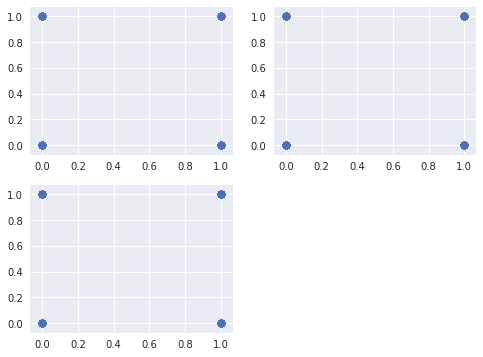

In [36]:
#Creating a Scatterplot between different diseases and the Absent_for_Appointment colum to check for correlations
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.scatter(x='Hipertension', y='Absent_for_Appointment', data=medappoints)
plt.subplot(2,2,2)
plt.scatter(x='Diabetes', y='Absent_for_Appointment', data=medappoints)
plt.subplot(2,2,3)
plt.scatter(x='Handicapped', y='Absent_for_Appointment', data=medappoints)

In [37]:
# .corr() is a method in python for checking for correlations between all numerical variabes at once
medappoints.corr()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
PatientId,1.000000,-0.004183,-0.002702,-0.006515,0.001721,0.011055,-0.008184,-0.009859,-0.001374
Age,-0.004183,1.000000,-0.092119,0.503676,0.291760,0.095686,0.081951,0.012774,-0.060794
Scholarship,-0.002702,-0.092119,1.000000,-0.019241,-0.024612,0.035224,-0.009192,0.001202,0.029391
Hipertension,-0.006515,0.503676,-0.019241,1.000000,0.432264,0.088087,0.081366,-0.006238,-0.036176
Diabetes,0.001721,0.291760,-0.024612,0.432264,1.000000,0.018634,0.054716,-0.014782,-0.015169
Alcoholism,0.011055,0.095686,0.035224,0.088087,0.018634,1.000000,0.003118,-0.026080,-0.000245
Handicapped,-0.008184,0.081951,-0.009192,0.081366,0.054716,0.003118,1.000000,-0.024031,-0.007762
SMS_received,-0.009859,0.012774,0.001202,-0.006238,-0.014782,-0.026080,-0.024031,1.000000,0.126678
Absent_for_Appointment,-0.001374,-0.060794,0.029391,-0.036176,-0.015169,-0.000245,-0.007762,0.126678,1.000000


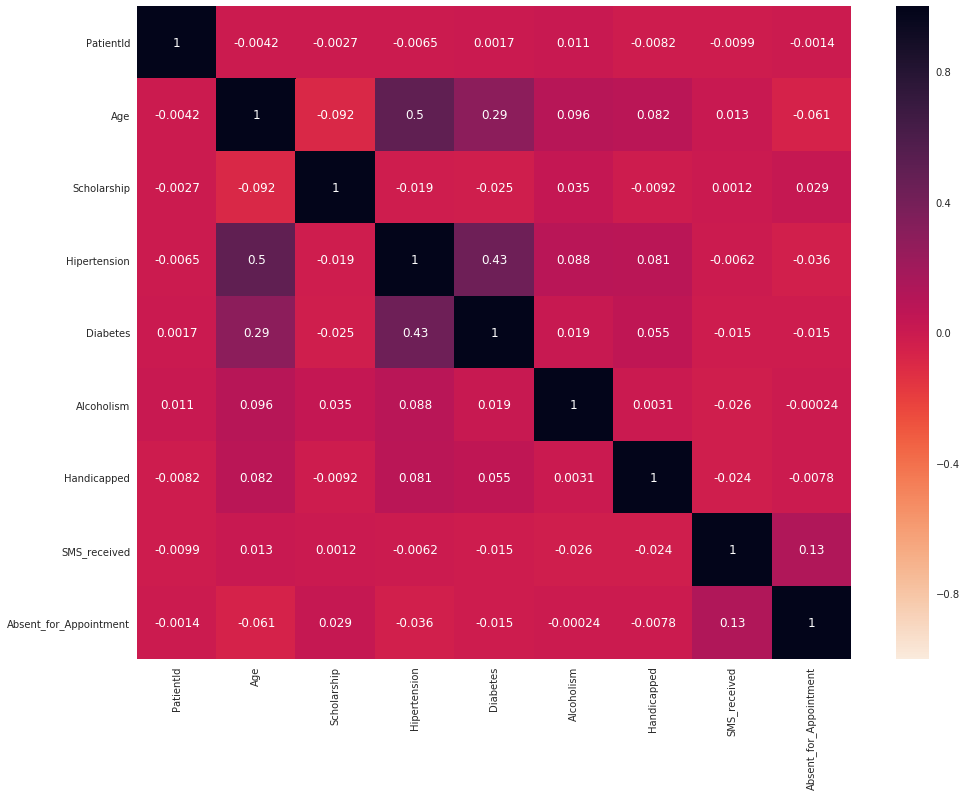

In [38]:
#An hatmap is a visualization in python that can be used for checking correlations between numerical columns by using colour scales
#and correlation calculations
import seaborn as sns
sns.heatmap(medappoints.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

#### Conclusion: The conclusion from the analysis done above and the visualizations is that there is little relationship between disease types and not showing up for an appointments

### 2. Which age groups are most likely to show up for appointments

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [40]:
# getting the min, 25%, 50%, 75%, max pH values with Pandas describe
medappoints['Age'].describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [41]:
# age edges that will be used to "cut" the age column in the data into groups
age_edges = [ 0, 18, 37, 55, 115]

In [42]:
# Labels for the four age groups
age_names = [ 'children and teenagers', 'Young Adults', 'Adults', 'Old People']

In [43]:
# Creates age_groups column
medappoints['age_groups'] = pd.cut(medappoints['Age'], age_edges, labels=age_names)

# Checks for successful creation of this column
medappoints.head()

,PatientId,Gender,ScheduledDay,ScheduledTime,ScheduledWeekday,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment,age_groups
0,29872499824296,F,2016-04-29 18:38:08,18:38:08,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Old People
1,558997776694438,M,2016-04-29 16:08:27,16:08:27,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Old People
2,4262962299951,F,2016-04-29 16:19:04,16:19:04,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Old People
3,867951213174,F,2016-04-29 17:29:31,17:29:31,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,children and teenagers
4,8841186448183,F,2016-04-29 16:07:23,16:07:23,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Old People


In [44]:
#grouping by the count for age groups and absent for appoitment to have a more closer look at the age groups
medappoints.groupby(['age_groups', 'Absent_for_Appointment']).count()

PatientId  Gender  \
age_groups             Absent_for_Appointment                      
children and teenagers 0                           19579   19579   
                       1                            5701    5701   
Young Adults           0                           20804   20804   
                       1                            6408    6408   
Adults                 0                           21623   21623   
                       1                            5247    5247   
Old People             0                           23143   23143   
                       1                            4283    4283   

                                               ScheduledDay  ScheduledTime  \
age_groups             Absent_for_Appointment                                
children and teenagers 0                              19579          19579   
                       1                               5701           5701   
Young Adults           0                              20804          20804   
                       1                               6408           6408   
Adults                 0                              21623          21623   
                       1                               5247           5247   
Old People             0                              23143          23143   
                       1                               4283           4283   

                                               ScheduledWeekday  \
age_groups             Absent_for_Appointment                     
children and teenagers 0                                  19579   
                       1                                   5701   
Young Adults           0                                  20804   
                       1                                   6408   
Adults                 0                                  21623   
                       1                                   5247   
Old People             0                                  23143   
                       1                                   4283   

                                               AppointmentDay    Age  \
age_groups             Absent_for_Appointment                          
children and teenagers 0                                19579  19579   
                       1                                 5701   5701   
Young Adults           0                                20804  20804   
                       1                                 6408   6408   
Adults                 0                                21623  21623   
                       1                                 5247   5247   
Old People             0                                23143  23143   
                       1                                 4283   4283   

                                               Neighbourhood  Scholarship  \
age_groups             Absent_for_Appointment                               
children and teenagers 0                               19579        19579   
                       1                                5701         5701   
Young Adults           0                               20804        20804   
                       1                                6408         6408   
Adults                 0                               21623        21623   
                       1                                5247         5247   
Old People             0                               23143        23143   
                       1                                4283         4283   

                                               Hipertension  Diabetes  \
age_groups             Absent_for_Appointment                           
children and teenagers 0                              19579     19579   
                       1                               5701      5701   
Young Adults           0                              20804     20804   
                       1                               64

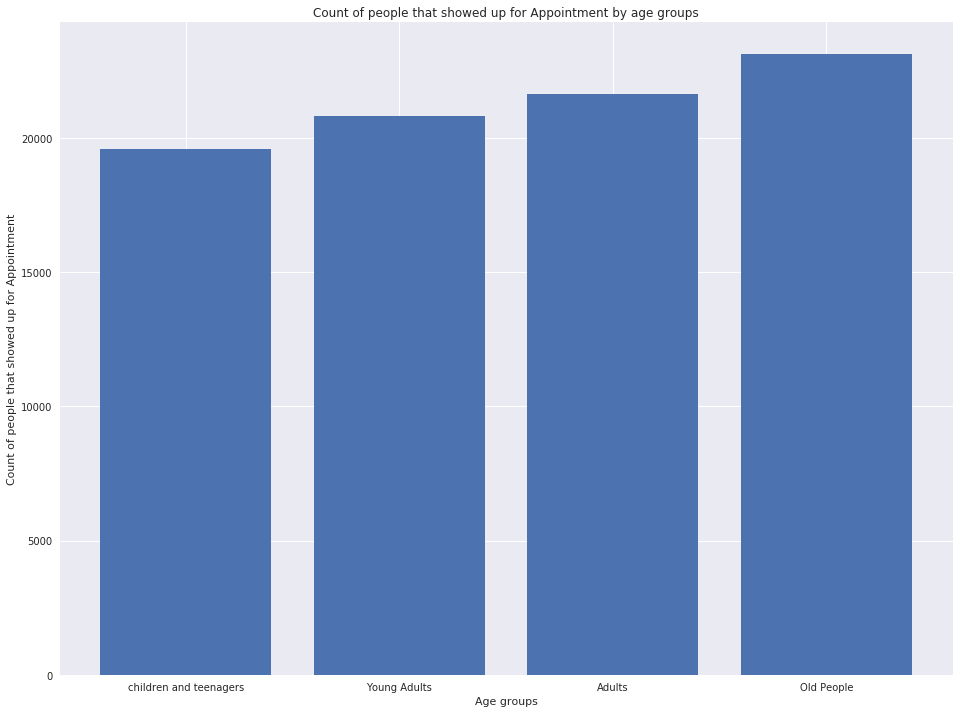

In [45]:
#plotting count of people that showed up for appointments against age group
locations2 = [1, 2, 3, 4]
heights2 = [19579, 20804, 21623, 23143,]
plt.bar(locations2, heights2, tick_label=age_names)
plt.title('Count of people that showed up for Appointment by age groups')
plt.xlabel('Age groups')
plt.ylabel('Count of people that showed up for Appointment');

#### Conclusion: From the analysis and the visualization above, I can conclude that old people are more likely to show up for appointments than every other age groups

### 3. In grouping gender and age together, which gender in different age groups is more likely to show up for an appointment?

The third analysis is a continuation of the second one, I can continue from where I stopped the second analysis

In [46]:
#grouping by the count for gender and absent for appoitment to have a more closer look at the age groups
medappoints.groupby(['Gender', 'Absent_for_Appointment']).count()

PatientId  ScheduledDay  ScheduledTime  \
Gender Absent_for_Appointment                                           
F      0                           57162         57162          57162   
       1                           14568         14568          14568   
M      0                           30887         30887          30887   
       1                            7710          7710           7710   

                               ScheduledWeekday  AppointmentDay    Age  \
Gender Absent_for_Appointment                                            
F      0                                  57162           57162  57162   
       1                                  14568           14568  14568   
M      0                                  30887           30887  30887   
       1                                   7710            7710   7710   

                               Neighbourhood  Scholarship  Hipertension  \
Gender Absent_for_Appointment                                             
F      0                               57162        57162         57162   
       1                               14568        14568         14568   
M      0                               30887        30887         30887   
       1                                7710         7710          7710   

                               Diabetes  Alcoholism  Handicapped  \
Gender Absent_for_Appointment                                      
F      0                          57162       57162        57162   
       1                          14568       14568        14568   
M      0                          30887       30887        30887   
       1                           7710        7710         7710   

                               SMS_received  age_groups  
Gender Absent_for_Appointment                            
F      0                              57162       55760  
       1                              14568       14249  
M      0                              30887       29389  
       1                               7710        7390

In [47]:
#grouping by the count for age groups,gender and absent for appointment to have a more closer look at the age groups and gender
medappoints.groupby(['age_groups', 'Gender', 'Absent_for_Appointment']).count()

PatientId  ScheduledDay  \
age_groups             Gender Absent_for_Appointment                            
children and teenagers F      0                           10227         10227   
                              1                            2988          2988   
                       M      0                            9352          9352   
                              1                            2713          2713   
Young Adults           F      0                           15130         15130   
                              1                            4663          4663   
                       M      0                            5674          5674   
                              1                            1745          1745   
Adults                 F      0                           14847         14847   
                              1                            3631          3631   
                       M      0                            6776          6776   
                              1                            1616          1616   
Old People             F      0                           15556         15556   
                              1                            2967          2967   
                       M      0                            7587          7587   
                              1                            1316          1316   

                                                      ScheduledTime  \
age_groups             Gender Absent_for_Appointment                  
children and teenagers F      0                               10227   
                              1                                2988   
                       M      0                                9352   
                              1                                2713   
Young Adults           F      0                               15130   
                              1                                4663   
                       M      0                                5674   
                              1                                1745   
Adults                 F      0                               14847   
                              1                                3631   
                       M      0                                6776   
                              1                                1616   
Old People             F      0                               15556   
                              1                                2967   
                       M      0                                7587   
                              1                                1316   

                                                      ScheduledWeekday  \
age_groups             Gender Absent_for_Appointment                     
children and teenagers F      0                                  10227   
                              1                                   2988   
                       M      0                                   9352   
                              1                                   2713   
Young Adults           F      0                                  15130   
                              1                                   4663   
                       M      0                                   5674   
                              1                                   1745   
Adults                 F      0                                  14847   
                              1                                   3631   
                       M      0                                   6776   
                              1                                   1616   
Old People             F      0                                  15556   
                              1                                   2967   
                       M      0                                   7587   
                              1                           

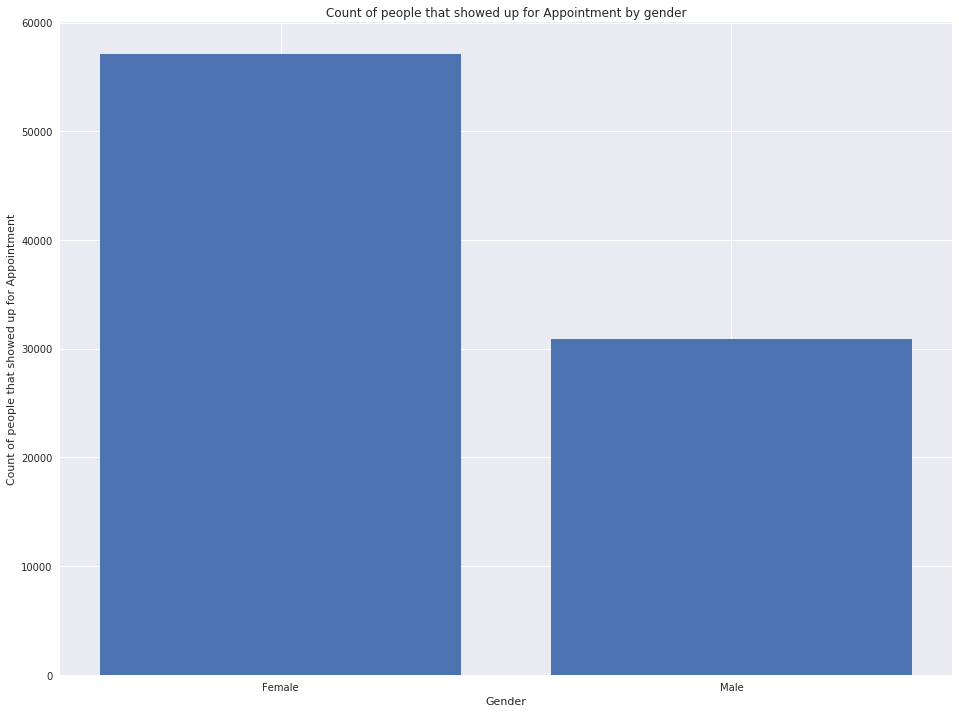

In [48]:
#plotting count of people that showed up for appointments against gender
locations2 = [1, 2]
heights2 = [57162, 30887]
gender_names= ['Female','Male']
plt.bar(locations2, heights2, tick_label=gender_names)
plt.title('Count of people that showed up for Appointment by gender')
plt.xlabel('Gender')
plt.ylabel('Count of people that showed up for Appointment');

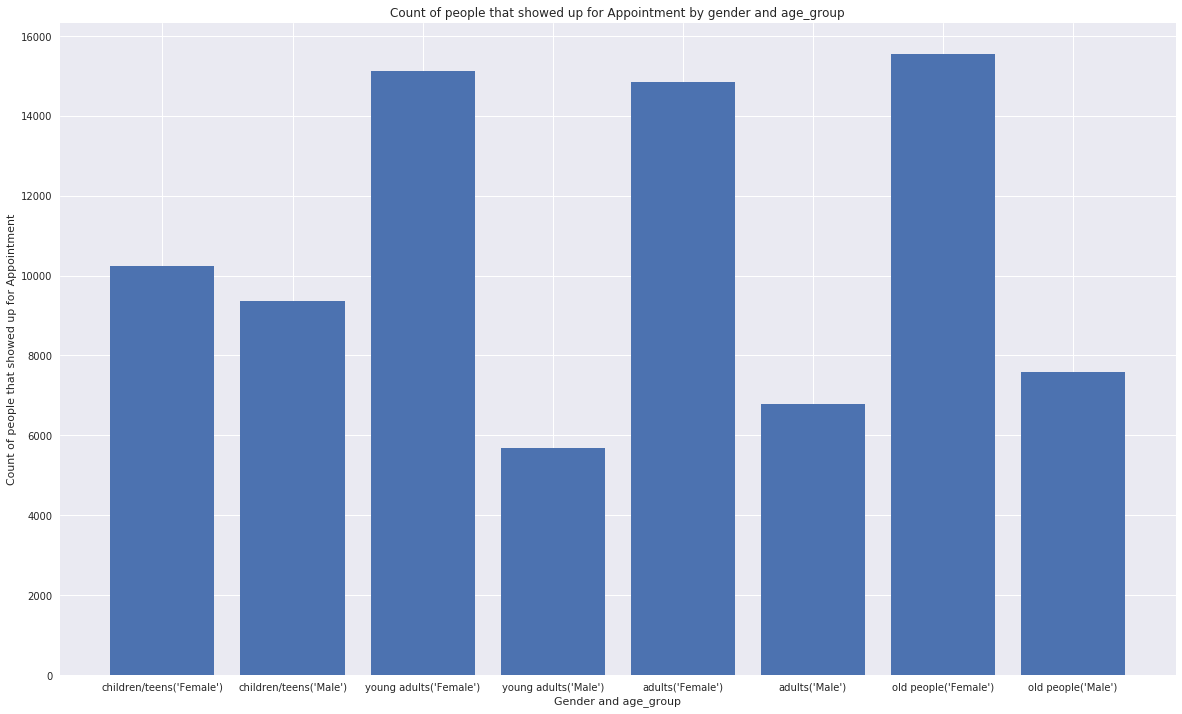

In [49]:
#plotting count of people that showed up for appointments against gender and age group
plt.figure(figsize=(20, 12))
locations3 = [1, 2, 3, 4, 5, 6, 7, 8]
heights3 = [10227, 9352, 15130, 5674, 14847, 6776, 15556, 7587]
agegender_names= ["children/teens('Female')","children/teens('Male')","young adults('Female')", "young adults('Male')",
              "adults('Female')", "adults('Male')", "old people('Female')", "old people('Male')"]
plt.bar(locations3, heights3, tick_label=agegender_names)
plt.title('Count of people that showed up for Appointment by gender and age_group')
plt.xlabel('Gender and age_group')
plt.ylabel('Count of people that showed up for Appointment');

#### Conclusion: As it can be seen from the analysis and the visualization above, I can conclude that females in all age groups are more likely to show up for appointments than males in all age groups

### 4. Which day of the week do patients often miss and show up for their appointments?

In [50]:
#grouping by the count for ScheduledWeekday and absent for appoitment to have a more closer look at the Week days
medappoints.groupby(['ScheduledWeekday', 'Absent_for_Appointment']).count()

PatientId  Gender  ScheduledDay  \
ScheduledWeekday Absent_for_Appointment                                    
Friday           0                           15000   15000         15000   
                 1                            3881    3881          3881   
Monday           0                           18492   18492         18492   
                 1                            4552    4552          4552   
Saturday         0                              23      23            23   
                 1                               1       1             1   
Thursday         0                           14348   14348         14348   
                 1                            3696    3696          3696   
Tuesday          0                           20834   20834         20834   
                 1                            5277    5277          5277   
Wednesday        0                           19352   19352         19352   
                 1                            4871    4871          4871   

                                         ScheduledTime  AppointmentDay    Age  \
ScheduledWeekday Absent_for_Appointment                                         
Friday           0                               15000           15000  15000   
                 1                                3881            3881   3881   
Monday           0                               18492           18492  18492   
                 1                                4552            4552   4552   
Saturday         0                                  23              23     23   
                 1                                   1               1      1   
Thursday         0                               14348           14348  14348   
                 1                                3696            3696   3696   
Tuesday          0                               20834           20834  20834   
                 1                                5277            5277   5277   
Wednesday        0                               19352           19352  19352   
                 1                                4871            4871   4871   

                                         Neighbourhood  Scholarship  \
ScheduledWeekday Absent_for_Appointment                               
Friday           0                               15000        15000   
                 1                                3881         3881   
Monday           0                               18492        18492   
                 1                                4552         4552   
Saturday         0                                  23           23   
                 1                                   1            1   
Thursday         0                               14348        14348   
                 1                                3696         3696   
Tuesday          0                               20834        20834   
                 1                                5277         5277   
Wednesday        0                               19352        19352   
                 1                                4871         4871   

                                         Hipertension  Diabetes  Alcoholism  \
ScheduledWeekday Absent_for_Appointment                                       
Friday           0                              15000     15000       15000   
                 1                               3881      3881        3881   
Monday           0                              18492     18492       18492   
                 1                               4552      4552        4552   
Saturday         0                                 23        23          23   
                 1                                  1         1           1   
Thursday         0                              14348     14348       14348   
                 1                               3696      3696        3696   
Tuesday          0                              20834   

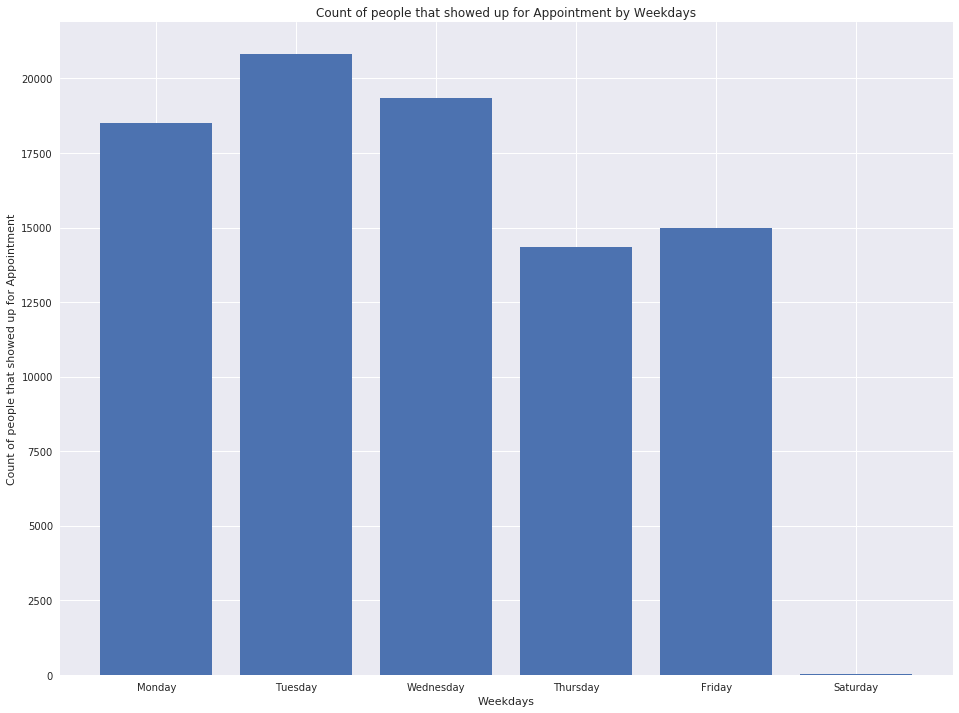

In [51]:
#plotting count of people that showed up for appointments against weekdays
locations4 = [1, 2, 3, 4, 5, 6]
heights4 = [18492, 20834, 19352, 14348, 15000, 23]
day_names= ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(locations4, heights4, tick_label=day_names)
plt.title('Count of people that showed up for Appointment by Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Count of people that showed up for Appointment');

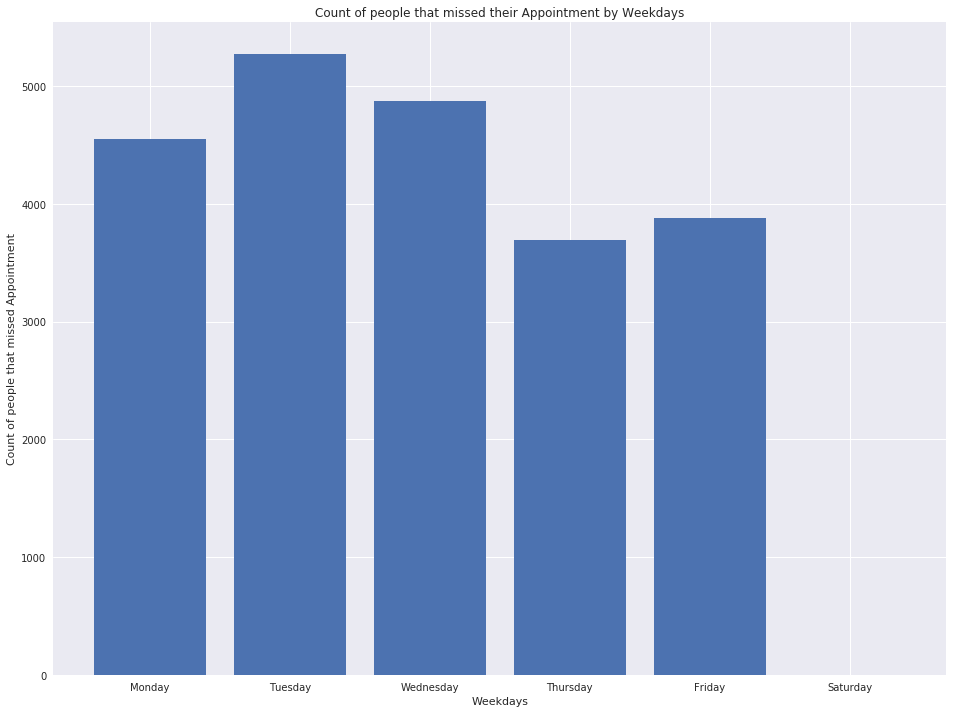

In [52]:
#plotting count of people that missed appointments against weekdays
locations5 = [1, 2, 3, 4, 5, 6]
heights5 = [4552, 5277, 4871, 3696, 3881, 1]
day_names= ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(locations5, heights5, tick_label=day_names)
plt.title('Count of people that missed their Appointment by Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Count of people that missed Appointment');

#### Conclusion: As it can be seen from the analysis and the visualization above, I can conclude that People often showedup for their appointments on tuesdays and they mostly missed their appointments on Tuesdays, making Tuesdays the busiest day for appointments

### 5. Which factors/featured characterizes and differentiates appointments that are often missed and not?

In [53]:
#picking out rows where the Absent for appointment column is 0 which implies that patients showed up
present_appointment = medappoints.query('Absent_for_Appointment == 0')

In [54]:
#Getting a Summary Statistics of the rows where patients came for 
present_appointment.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
count,8.804900e+04,88049.000000,88049.000000,88049.000000,88049.000000,88049.000000,88049.000000,88049.000000,88049.0
mean,1.477015e+14,37.777090,0.093880,0.204068,0.073573,0.030404,0.019035,0.291429,0.0
std,2.564127e+14,23.330356,0.291663,0.403021,0.261076,0.171696,0.136648,0.454423,0.0
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.171540e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.176815e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.433715e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [55]:
#picking out rows where absent for appointment is 1 which implies that patients missed their appointments
absent_appointment = medappoints.query('Absent_for_Appointment == 1')

In [56]:
#Getting the summary statistics of rows where patients missed their appointments
absent_appointment.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicapped,SMS_received,Absent_for_Appointment
count,2.227800e+04,22278.000000,22278.000000,22278.000000,22278.000000,22278.000000,22278.000000,22278.000000,22278.0
mean,1.468248e+14,34.279109,0.115675,0.168238,0.063830,0.030299,0.016429,0.438774,1.0
std,2.550581e+14,21.935121,0.319842,0.374086,0.244455,0.171412,0.127120,0.496248,0.0
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.160938e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.455212e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Feature: 0, Score: 0.86055
Feature: 1, Score: 0.11091
Feature: 2, Score: 0.00159
Feature: 3, Score: 0.00189
Feature: 4, Score: 0.00147
Feature: 5, Score: 0.00163
Feature: 6, Score: 0.00147
Feature: 7, Score: 0.02048


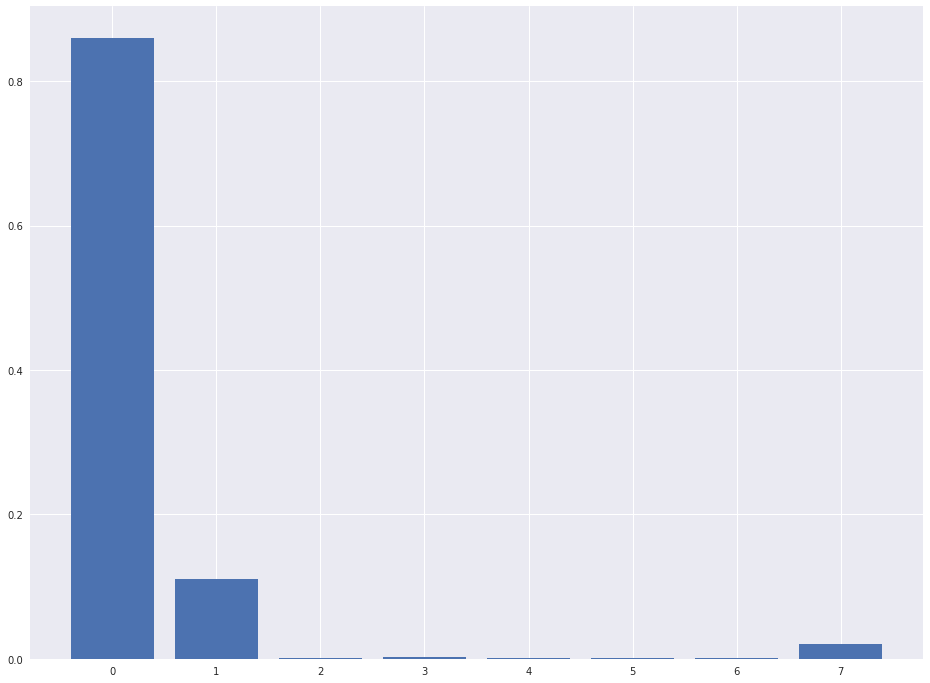

In [65]:
#selecting important features by using classification prediction method 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the dependent variable and independent variables
X = medappoints.iloc[:, [0,6,8,9,10,11,12,13]]
y = medappoints.iloc[:, 14]
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Conclusion: As it can be seen from the analysis and the visualization hebove, I can draw the conclusion that of the numerical features present in the data, 3 major features are contributing to the prediction of absent for appointment. The major feature making contribution towards the prediction is PatientId, followed by Age, followed by SMS_received

<a id='conclusions'></a>
## Conclusions

We would normally think that some diseases and major while some and minor and these major diseases contribute to the number of visits or appointments with doctors but in actual fact, it is not just about the severity of diseases, there are lots of factors that contribute to patients showing up for or missing their appointments. Some of these factors include whether a patient received a patient received an SMS or not reminding them of their appointment(since there is the forgetfulness factor when there are lots things o think about), the age groups that the patient falls under as it was quite interesting to see from the data that females from all age groups and specifically old people who are females tend to show up for their appointments rather than young people. This conclusion can't be said to be statistically correct owing to few limitations which are:
1. Generally in the dataset (since it could just be a sample), there are more female records than male records.
2. Statistical methods were not applied during the process of the analysis.
In performing further analysis of this dataset, it would be advisable to divide up the dataset based on gender and get different analysis results in the different group to be able to come up with a candid conclusion based on gender and even age groups. In order to have a statistically correct analysis, it is advisable to use Inferential statistics such as 

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0